In [38]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [39]:
def disp(img,cmap='gray'):
    fig=plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

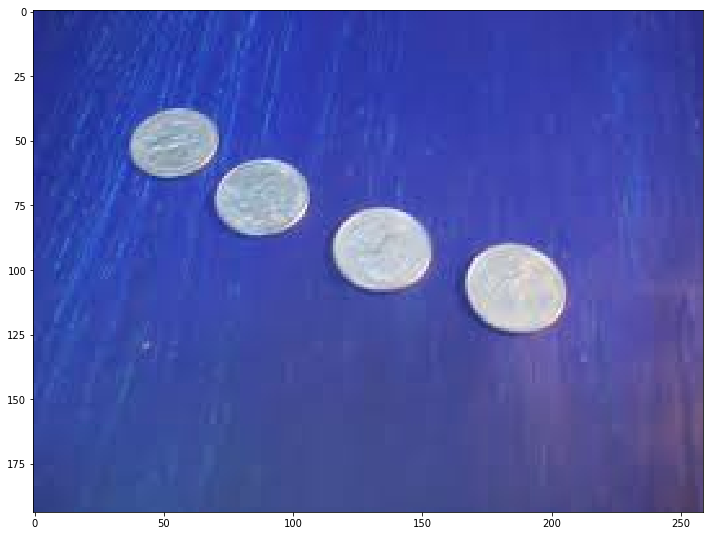

In [42]:
brd=cv2.imread('/root/Desktop/python/coin.jpeg')
disp(brd)

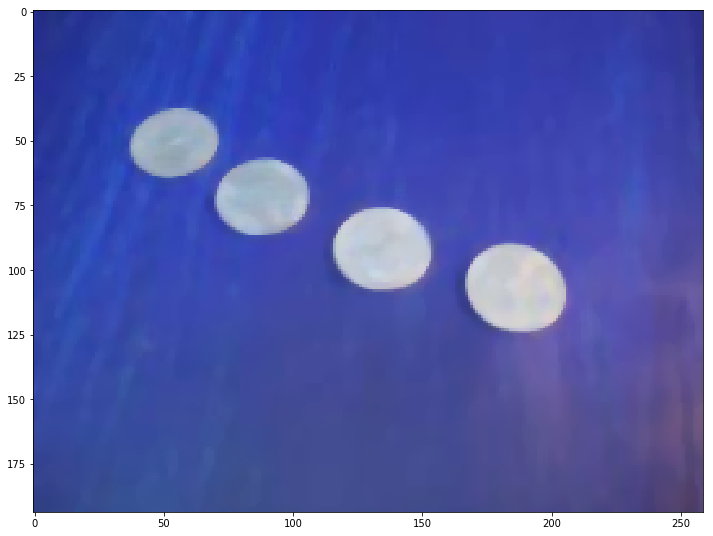

In [43]:
blrbrd=cv2.medianBlur(brd,5)
disp(blrbrd)

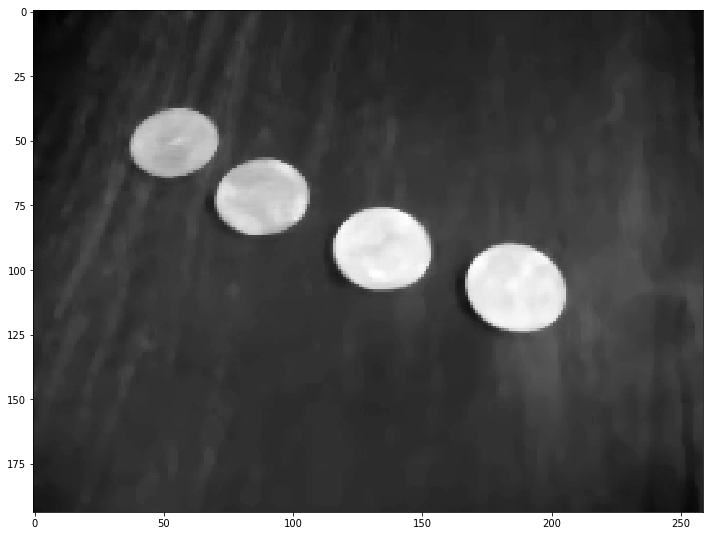

In [44]:
grybrd=cv2.cvtColor(blrbrd,cv2.COLOR_BGR2GRAY )
disp(grybrd)

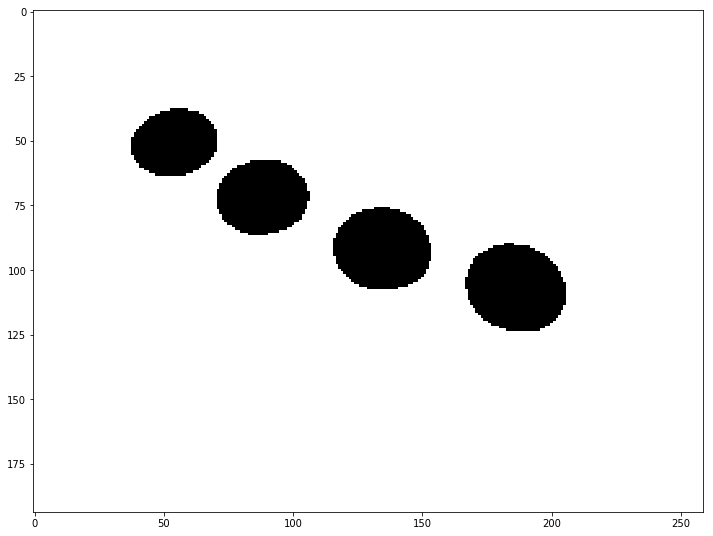

In [47]:
ret,thresh=cv2.threshold(grybrd,155,255,cv2.THRESH_BINARY_INV)
disp(thresh)

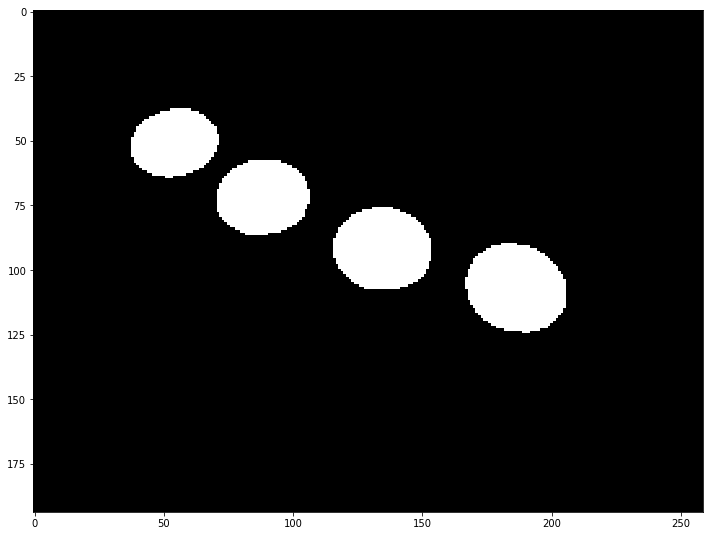

In [56]:
ret1,thresh1=cv2.threshold(grybrd,90,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
disp(thresh1)

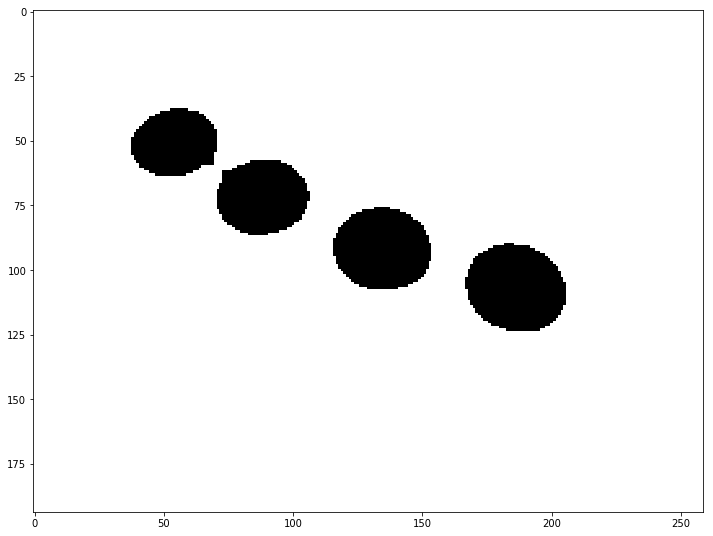

In [63]:
#noise removal
kernel=np.ones((3,3),np.uint8)
opening=cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=3)
disp(opening)

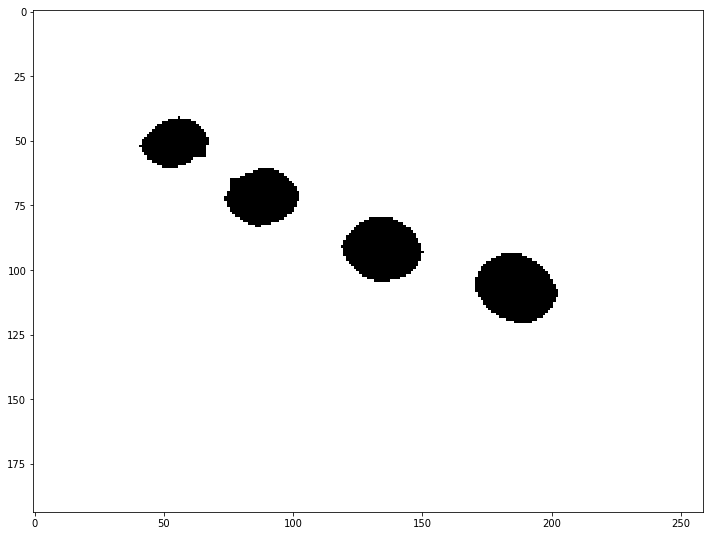

In [66]:
sure_bg=cv2.dilate(opening,kernel,iterations=3)
disp(sure_bg)

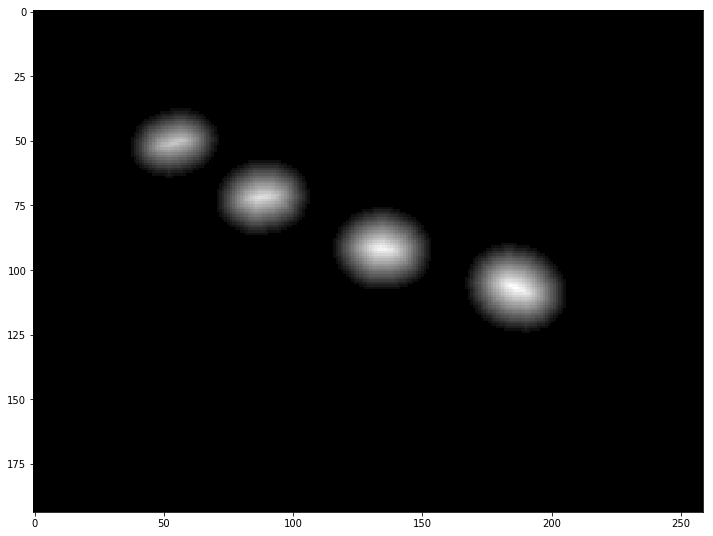

In [64]:
dist_transform=cv2.distanceTransform(thresh1,cv2.DIST_L2,5)
disp(dist_transform)

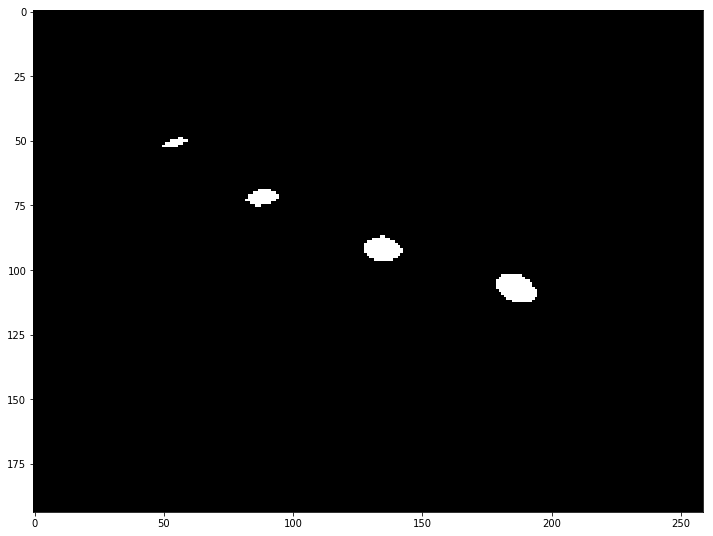

In [65]:
ret,sure_fg=cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
disp(sure_fg)

In [69]:
sure_fg=np.uint8(sure_fg)

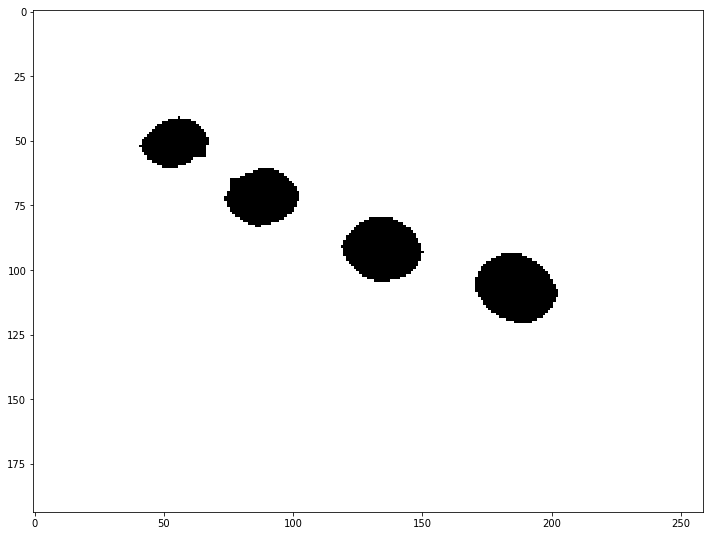

In [71]:
unknown=cv2.subtract(sure_bg,sure_fg)
disp(unknown)

In [74]:
markers=markers+1

In [76]:
markers[unknown==255]=0

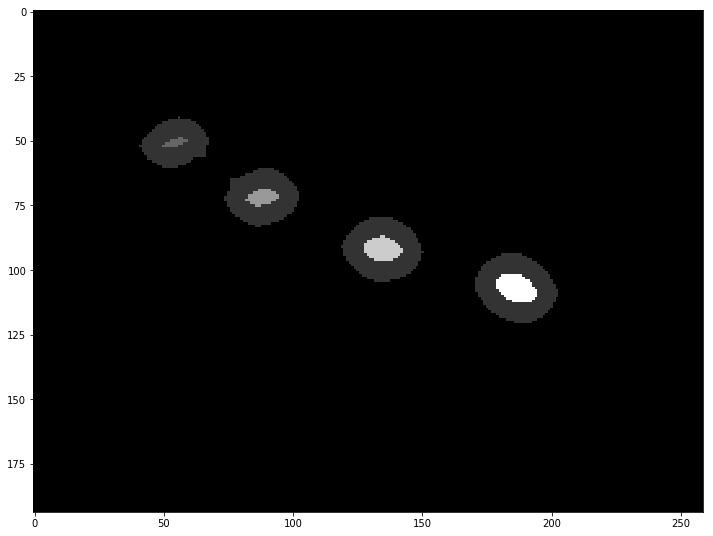

In [77]:
disp(markers)

In [78]:
contours,hierarchy=cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [89]:
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(blrbrd,contours,i,(255,0,0),3)

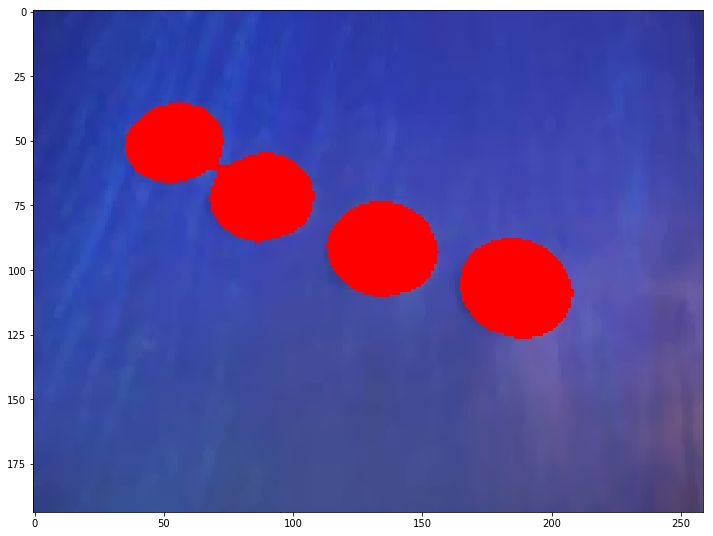

In [90]:
disp(blrbrd)